In [1]:
# Import libraries
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Widen jupyter notebook cells
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

# Show all columns in the head command
pd.set_option('display.max_columns', None)

In [4]:
# Load data from the csv file into a DataFrame and save in a variable
df = pd.read_csv("disney_plus_titles.csv")

In [5]:
df.head(len(df))

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...
...,...,...,...,...,...,...,...,...,...,...,...,...
1445,s1446,Movie,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...","United States, United Kingdom","June 4, 2021",2009,PG-13,108 min,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...
1446,s1447,Movie,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...","United States, Canada","April 2, 2021",2009,PG,106 min,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...
1447,s1448,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...","United Kingdom, Germany, United States","December 18, 2020",2016,PG-13,107 min,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum..."
1448,s1449,Movie,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...","United Kingdom, Germany, United States","September 18, 2020",2003,PG-13,112 min,"Buddy, Comedy, Coming of Age",Despite the wishes of their traditional famili...


In [9]:
# Informations on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       1450 non-null   object        
 1   type          1450 non-null   object        
 2   title         1450 non-null   object        
 3   director      977 non-null    object        
 4   cast          1260 non-null   object        
 5   country       1231 non-null   object        
 6   date_added    1447 non-null   datetime64[ns]
 7   release_year  1450 non-null   int64         
 8   rating        1447 non-null   object        
 9   duration      1450 non-null   object        
 10  listed_in     1450 non-null   object        
 11  description   1450 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 136.1+ KB


In [8]:
# Convert the `date` column to datetime
df['date_added'] = pd.to_datetime(df['date_added'])

In [7]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [18]:
df['release_year'].unique()

array([1928, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941,
       1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952,
       1953, 1954, 1955, 1956, 1957, 1959, 1960, 1961, 1962, 1963, 1964,
       1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020, 2021], dtype=int64)

In [19]:
df['release_year'].value_counts()

2021    125
2020    114
2019     99
2017     69
2018     65
       ... 
1944      1
1945      1
1968      1
1970      1
1928      1
Name: release_year, Length: 90, dtype: int64

In [17]:
df.sort_values(by=['release_year'], ascending=True, inplace=True)
df.head(len(df))

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1220,s1221,Movie,Steamboat Willie,"Walt Disney, Ub Iwerks",Walt Disney,United States,2019-11-12,1928,TV-Y7,8 min,"Animation, Family, Kids",Watch Mickey Mouse's classic cartoon debut. Se...
893,s894,Movie,Flowers and Trees,Burt Gillett,NaN,United States,2019-11-12,1932,TV-Y7,8 min,"Animation, Family, Kids","It's spring, and the flowers, mushrooms, and t..."
1178,s1179,Movie,Santa's Workshop,Wilfred Jackson,NaN,United States,2019-11-12,1932,TV-G,7 min,"Animation, Family, Fantasy",Santa and his elves make toys to deliver on Ch...
736,s737,Movie,Babes in the Woods,Burt Gillett,NaN,United States,2019-11-12,1932,TV-Y7,8 min,"Animation, Family, Fantasy",Two children wander the forest and get lured i...
1317,s1318,Movie,The Pied Piper,Wilfred Jackson,NaN,United States,2019-11-12,1933,TV-G,8 min,"Animation, Family, Musical",The Pied Piper lures the children out of town....
...,...,...,...,...,...,...,...,...,...,...,...,...
148,s149,TV Show,Mickey Mouse Funhouse,NaN,"Bret Iwan, Kaitlyn Robrock, Bill Farmer, Tony ...",United States,2021-07-28,2021,TV-Y,1 Season,"Animation, Kids",Mickey Mouse Funhouse is filled with silly adv...
145,s146,TV Show,Chip 'n' Dale: Park Life,NaN,"Matthew Géczy, Kaycie Chase, Bill Farmer, Sylv...",NaN,2021-07-28,2021,TV-Y7,1 Season,"Animation, Buddy, Comedy",Two tiny chipmunks have huge adventures while ...
143,s144,Movie,Built for Mars: The Perseverance Rover,Mark J Davis,Steven French,NaN,2021-07-30,2021,TV-PG,88 min,Documentary,BUILT FOR MARS: THE PERSEVERANCE ROVER follows...
173,s174,Movie,"Miraculous World: Shanghai, The Legend of Lady...",Thomas Astruc,"Cristina 'Vee"" Valenzuela, Bryce Papenbrook, K...",NaN,2021-07-09,2021,TV-Y7-FV,54 min,"Animation, Fantasy",Marinette heads to Shanghai to meet Adrien.


In [22]:
# Types of shows
df["type"].value_counts()

Movie      1052
TV Show     398
Name: type, dtype: int64

In [23]:
# Reasons for high standard deviation
df["type"].value_counts(normalize=True)

Movie      0.725517
TV Show    0.274483
Name: type, dtype: float64

In [24]:
df['rating'].unique()

array(['TV-Y7', 'TV-G', 'TV-PG', 'G', 'PG', 'TV-Y', 'TV-Y7-FV', 'PG-13',
       'TV-14', nan], dtype=object)

In [26]:
df['cast'].unique()

array(['Walt Disney', nan,
       'Billy Bletcher, Pinto Colvig, Dorothy Compton, Mary Moder', ...,
       'Steven French',
       'Cristina \'Vee" Valenzuela, Bryce Papenbrook, Keith Silverstein, Carrie Keranen, Todd Haberkorn, Max Mittelman',
       'Paget Brewster'], dtype=object)

In [ ]:
# Analyzing show types

In [20]:
# Filter using variable

value='Movie'
df2=df.query("type == @value")

In [21]:
df2.head(len(df))

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1220,s1221,Movie,Steamboat Willie,"Walt Disney, Ub Iwerks",Walt Disney,United States,2019-11-12,1928,TV-Y7,8 min,"Animation, Family, Kids",Watch Mickey Mouse's classic cartoon debut. Se...
893,s894,Movie,Flowers and Trees,Burt Gillett,NaN,United States,2019-11-12,1932,TV-Y7,8 min,"Animation, Family, Kids","It's spring, and the flowers, mushrooms, and t..."
1178,s1179,Movie,Santa's Workshop,Wilfred Jackson,NaN,United States,2019-11-12,1932,TV-G,7 min,"Animation, Family, Fantasy",Santa and his elves make toys to deliver on Ch...
736,s737,Movie,Babes in the Woods,Burt Gillett,NaN,United States,2019-11-12,1932,TV-Y7,8 min,"Animation, Family, Fantasy",Two children wander the forest and get lured i...
1317,s1318,Movie,The Pied Piper,Wilfred Jackson,NaN,United States,2019-11-12,1933,TV-G,8 min,"Animation, Family, Musical",The Pied Piper lures the children out of town....
...,...,...,...,...,...,...,...,...,...,...,...,...
166,s167,Movie,Shark Attack Investigation: The Paige Winter S...,NaN,NaN,NaN,2021-07-16,2021,TV-14,44 min,"Animals & Nature, Documentary",A teen survives facing one of the ocean’s dead...
155,s156,Movie,Stuntman,Kurt Mattila,Eddie Braun,NaN,2021-07-23,2021,TV-14,87 min,Documentary,Stuntman Eddie Braun attempts to complete Evel...
152,s153,Movie,Playing with Sharks,NaN,"Valerie Taylor, Dr. Sylvia Earle, Jeremiah Sul...",NaN,2021-07-23,2021,TV-14,91 min,"Animals & Nature, Biographical, Documentary","""Playing with Sharks"" captures the life of con..."
143,s144,Movie,Built for Mars: The Perseverance Rover,Mark J Davis,Steven French,NaN,2021-07-30,2021,TV-PG,88 min,Documentary,BUILT FOR MARS: THE PERSEVERANCE ROVER follows...


In [27]:
# Spliting duration column in two new columns, one for the number and other for the measurement unit
df2[['duration', 'min']] = df2['duration'].str.split(' ', 1, expand=True)

C:\Users\rafas\AppData\Local\Temp\ipykernel_7000\1100861067.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['duration', 'min']] = df2['duration'].str.split(' ', 1, expand=True)
C:\Users\rafas\AppData\Local\Temp\ipykernel_7000\1100861067.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['duration', 'min']] = df2['duration'].str.split(' ', 1, expand=True)


In [31]:
df2.head(len(df))

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,min
1220,s1221,Movie,Steamboat Willie,"Walt Disney, Ub Iwerks",Walt Disney,United States,2019-11-12,1928,TV-Y7,8,"Animation, Family, Kids",Watch Mickey Mouse's classic cartoon debut. Se...,min
893,s894,Movie,Flowers and Trees,Burt Gillett,NaN,United States,2019-11-12,1932,TV-Y7,8,"Animation, Family, Kids","It's spring, and the flowers, mushrooms, and t...",min
1178,s1179,Movie,Santa's Workshop,Wilfred Jackson,NaN,United States,2019-11-12,1932,TV-G,7,"Animation, Family, Fantasy",Santa and his elves make toys to deliver on Ch...,min
736,s737,Movie,Babes in the Woods,Burt Gillett,NaN,United States,2019-11-12,1932,TV-Y7,8,"Animation, Family, Fantasy",Two children wander the forest and get lured i...,min
1317,s1318,Movie,The Pied Piper,Wilfred Jackson,NaN,United States,2019-11-12,1933,TV-G,8,"Animation, Family, Musical",The Pied Piper lures the children out of town....,min
...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,s167,Movie,Shark Attack Investigation: The Paige Winter S...,NaN,NaN,NaN,2021-07-16,2021,TV-14,44,"Animals & Nature, Documentary",A teen survives facing one of the ocean’s dead...,min
155,s156,Movie,Stuntman,Kurt Mattila,Eddie Braun,NaN,2021-07-23,2021,TV-14,87,Documentary,Stuntman Eddie Braun attempts to complete Evel...,min
152,s153,Movie,Playing with Sharks,NaN,"Valerie Taylor, Dr. Sylvia Earle, Jeremiah Sul...",NaN,2021-07-23,2021,TV-14,91,"Animals & Nature, Biographical, Documentary","""Playing with Sharks"" captures the life of con...",min
143,s144,Movie,Built for Mars: The Perseverance Rover,Mark J Davis,Steven French,NaN,2021-07-30,2021,TV-PG,88,Documentary,BUILT FOR MARS: THE PERSEVERANCE ROVER follows...,min


In [36]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1052 entries, 1220 to 173
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       1052 non-null   object        
 1   type          1052 non-null   object        
 2   title         1052 non-null   object        
 3   director      977 non-null    object        
 4   cast          933 non-null    object        
 5   country       946 non-null    object        
 6   date_added    1052 non-null   datetime64[ns]
 7   release_year  1052 non-null   int64         
 8   rating        1051 non-null   object        
 9   duration      1052 non-null   object        
 10  listed_in     1052 non-null   object        
 11  description   1052 non-null   object        
 12  min           1052 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(11)
memory usage: 115.1+ KB


In [37]:
# Transforming object to int64

# Convert from String to int
df2 = df2.astype({'duration':'int64'})
print(df2.dtypes)

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                 int64
listed_in               object
description             object
min                     object
dtype: object


array([[<AxesSubplot:title={'center':'duration'}>]], dtype=object)

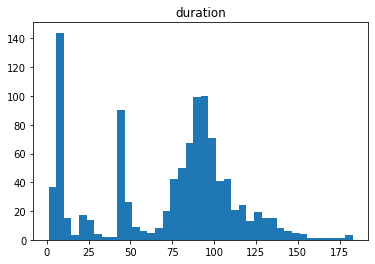

In [38]:
df2.hist(['duration'], bins=40, grid=False)

In [39]:
df2['Faixas'] =''

df2['Faixas'][(df2['duration']<60)] = 'short',
df2['Faixas'][(df2['duration']>=60)] = 'long'

df2.head(len(df))

C:\Users\rafas\AppData\Local\Temp\ipykernel_7000\2606417908.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Faixas'][(df2['duration']<60)] = 'short',
C:\Users\rafas\AppData\Local\Temp\ipykernel_7000\2606417908.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Faixas'][(df2['duration']>=60)] = 'long'


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,min,Faixas
1220,s1221,Movie,Steamboat Willie,"Walt Disney, Ub Iwerks",Walt Disney,United States,2019-11-12,1928,TV-Y7,8,"Animation, Family, Kids",Watch Mickey Mouse's classic cartoon debut. Se...,min,short
893,s894,Movie,Flowers and Trees,Burt Gillett,NaN,United States,2019-11-12,1932,TV-Y7,8,"Animation, Family, Kids","It's spring, and the flowers, mushrooms, and t...",min,short
1178,s1179,Movie,Santa's Workshop,Wilfred Jackson,NaN,United States,2019-11-12,1932,TV-G,7,"Animation, Family, Fantasy",Santa and his elves make toys to deliver on Ch...,min,short
736,s737,Movie,Babes in the Woods,Burt Gillett,NaN,United States,2019-11-12,1932,TV-Y7,8,"Animation, Family, Fantasy",Two children wander the forest and get lured i...,min,short
1317,s1318,Movie,The Pied Piper,Wilfred Jackson,NaN,United States,2019-11-12,1933,TV-G,8,"Animation, Family, Musical",The Pied Piper lures the children out of town....,min,short
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,s167,Movie,Shark Attack Investigation: The Paige Winter S...,NaN,NaN,NaN,2021-07-16,2021,TV-14,44,"Animals & Nature, Documentary",A teen survives facing one of the ocean’s dead...,min,short
155,s156,Movie,Stuntman,Kurt Mattila,Eddie Braun,NaN,2021-07-23,2021,TV-14,87,Documentary,Stuntman Eddie Braun attempts to complete Evel...,min,long
152,s153,Movie,Playing with Sharks,NaN,"Valerie Taylor, Dr. Sylvia Earle, Jeremiah Sul...",NaN,2021-07-23,2021,TV-14,91,"Animals & Nature, Biographical, Documentary","""Playing with Sharks"" captures the life of con...",min,long
143,s144,Movie,Built for Mars: The Perseverance Rover,Mark J Davis,Steven French,NaN,2021-07-30,2021,TV-PG,88,Documentary,BUILT FOR MARS: THE PERSEVERANCE ROVER follows...,min,long
